# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [2]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

NameError: name 'main' is not defined

In [3]:
df_courses = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/courses.csv')
df_students = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/students.csv')
df_course_cont = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/course_contents.csv')
df_progress = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/progresses.csv')
# прочитаем все необходимые данные
df_progr_phase = pd.read_csv(
    '/home/arcry/anaconda3/SkillBox/files/Anl_CW1/progress_phases.csv')

In [4]:
# объединим все данные
data = df_progress.merge(df_progr_phase, how='left', left_on='id', right_on='progress_id').merge(
    df_courses,  left_on='course_id', right_on='id').merge(df_course_cont, how='left', on=['course_id', 'module_number', 'lesson_number'])
# удалим все лишние столбцы
data = data.drop(columns=['id_x', 'id_y', 'Unnamed: 0'])
data.head()

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,3.0,done,2018-02-19 19:21:25.013391+00,2018-02-20 08:46:02.029132+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True
1,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,2.0,done,2018-02-19 19:21:25.002537+00,2018-02-20 08:46:02.022666+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Пишем ТЗ. Годные шаблоны,c75f28a2-02fe-47ce-929d-6db242111831,True,False
2,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,4.0,1.0,done,2018-02-19 19:21:24.985811+00,2018-02-20 08:46:02.007429+00,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Аналитика в digital-проектах,96c8b66c-6bce-4d02-908f-7577dc2b32b3,True,False
3,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1,8459fbc07e32ec92bd7b43d7df9bfa89,1.0,1.0,done,2018-02-06 21:47:41+00,2018-02-06 14:32:40+00,Руководитель digital-проектов,Business,Экологичный путь менеджера,Карта компетенций менеджера,023d96d8-63ac-4d6f-974f-a15add3cdb34,True,False
4,9dfc270466449081a82b19afd5fd44f4,0770b1b039964228294f1f34b29fc2c1,cc5799c97826d79ac3ede2791daac00e,4.0,3.0,fail,2018-03-17 13:50:55.262335+00,NaN,Руководитель digital-проектов,Business,Аналитика. Базовые навыки,Домашняя работа,e977dbbd-0b9f-461d-8599-b4abdc9e54f9,False,True


In [5]:
data[data.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # кол-во данных совпало с проверочным

,student_id,course_id,progress_id,module_number,lesson_number,status,start_date,finish_date,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
164816,768c2987a744c51ce64a5993a2a94eaf,dad6f6ffc086caa89e2f40c28a9c7490,6407c290505e790e92207a1dbc41a2cd,1.0,1.0,start,2018-06-20 14:25:13.010259+00,NaN,UX-дизайн,Design,Профессия дизайнера в эпоху цифровых перемен,Приветствие,86d0d49c-5590-4c0b-8fca-927191bb3fd5,True,False
187756,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,3.0,done,2018-06-19 15:08:14.103923+00,2018-06-19 15:39:53.661163+00,JavaScript с нуля,Development,Знакомство с языком,Инструменты разработчика,460c54ea-d899-44d3-8940-00302ff5f2e5,True,False
187757,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,1.0,done,2018-06-19 10:40:05.063485+00,2018-06-19 14:56:16.346353+00,JavaScript с нуля,Development,Знакомство с языком,Интро,0d4678b0-abfe-4132-9193-97f9b0f08d3a,True,False
187758,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,7.0,start,2018-06-19 18:40:00.576904+00,NaN,JavaScript с нуля,Development,Знакомство с языком,Домашняя работа,af6e818e-08f0-4e32-981e-95a35395ee8f,False,True
187759,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,5.0,done,2018-06-19 18:10:52.316728+00,2018-06-19 18:35:38.720317+00,JavaScript с нуля,Development,Знакомство с языком,Синтаксис языка,fe10ef7f-44cb-4184-b06f-d7c38b0e81a5,True,False
187760,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,6.0,done,2018-06-19 18:35:38.884217+00,2018-06-19 18:37:11.155066+00,JavaScript с нуля,Development,Знакомство с языком,Аутро,efe6a65b-a9a2-4d3a-910a-750e72c3f118,True,False
187761,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,4.0,done,2018-06-19 15:39:53.923777+00,2018-06-19 18:10:52.1737+00,JavaScript с нуля,Development,Знакомство с языком,"Hello, world!",73315f69-8587-4f46-ab6b-fe57c8f1aa52,True,False
187762,768c2987a744c51ce64a5993a2a94eaf,e9bb9205eeed307ee7cbaa08bfd166c3,c90ebe1431eac5cbb11692100b7a0f8d,1.0,2.0,done,2018-06-19 14:56:16.570129+00,2018-06-19 15:08:13.930725+00,JavaScript с нуля,Development,Знакомство с языком,Что умеет JavaScript и почему он так популярен?,6af5b93a-593b-48a0-bb03-42fa2571ede5,True,False
226582,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,2.0,4.0,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
226583,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,a387ab916f402cb3fbfffd29f68fd0ce,1.0,1.0,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False


In [6]:
data['title'].unique()  # посмотрим, какие есть курсы

array(['Руководитель digital-проектов', 'Интернет-маркетолог от Ingate',
       'Java-разработчик', 'Веб-вёрстка для начинающих 2.0',
       'Веб-дизайн Базовый', 'Веб-разработчик', 'UX-дизайн',
       'JavaScript с нуля', 'Excel Базовый', 'Веб-дизайн PRO 2.0',
       'Анимация интерфейсов', 'Веб-дизайн с нуля 2.0',
       'PHP-разработчик с 0 до PRO. Часть 1', 'Java-разработчик c нуля',
       'SMM-маркетолог от А до Я'], dtype=object)

In [7]:
data['title'].unique().size
# количество курсов равно 15

15

In [8]:
# посчитаем количество модулей в каждом курсе.rename(columns={'lesson_title': 'module_mean'})
data.groupby('title').agg({'module_title': 'nunique'}).reset_index()\
    .rename(columns={'module_title': 'module_count'})

,title,module_count
0,Excel Базовый,9
1,Java-разработчик,17
2,Java-разработчик c нуля,9
3,JavaScript с нуля,18
4,PHP-разработчик с 0 до PRO. Часть 1,8
5,SMM-маркетолог от А до Я,11
6,UX-дизайн,20
7,Анимация интерфейсов,21
8,Веб-вёрстка для начинающих 2.0,8
9,Веб-дизайн PRO 2.0,17


In [9]:
# посчитаем количество уроков в каждом модуле в каждом курсе
data.groupby(['title', 'module_title'])\
    .agg({'lesson_title': 'nunique'})\
    .reset_index().rename(columns={'lesson_title': 'lesson_count'})

,title,module_title,lesson_count
0,Excel Базовый,Визуализация данных Excel,5
1,Excel Базовый,Основной функционал Excel,11
2,Excel Базовый,Основной функционал Excel (продолжение),7
3,Excel Базовый,Сводные таблицы Excel,5
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5
...,...,...,...
224,Руководитель digital-проектов,Решение факапов. Lean/TOC. Обзор.,5
225,Руководитель digital-проектов,Требовательность digital-продюсера,4
226,Руководитель digital-проектов,Управление временем,4
227,Руководитель digital-проектов,Управление дизайнерами. Разработка дизайна по ...,7


In [10]:
# посчитаем медианное значение количества уроков в модуле в каждом курсе
data.groupby(['title', 'module_title'])\
    .agg({'lesson_title': 'nunique'})\
    .groupby('title').agg({'lesson_title': 'median'})\
    .reset_index().rename(columns={'lesson_title': 'module_median'})

,title,module_median
0,Excel Базовый,5.0
1,Java-разработчик,7.0
2,Java-разработчик c нуля,10.0
3,JavaScript с нуля,7.0
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
5,SMM-маркетолог от А до Я,6.0
6,UX-дизайн,3.5
7,Анимация интерфейсов,3.0
8,Веб-вёрстка для начинающих 2.0,7.0
9,Веб-дизайн PRO 2.0,5.0


In [46]:
# определим количество студентов на каждом курсе
stud_count = data.groupby(['title', 'field'])['student_id'].count().reset_index()\
.rename(columns={'student_id': 'students_count'}).sort_values('students_count')
stud_count

,title,field,students_count
12,Веб-разработчик,Development,5322
7,Анимация интерфейсов,Design,5937
4,PHP-разработчик с 0 до PRO. Часть 1,Development,5995
5,SMM-маркетолог от А до Я,Marketing,7693
2,Java-разработчик c нуля,Development,14301
10,Веб-дизайн Базовый,Design,16826
14,Руководитель digital-проектов,Business,16884
9,Веб-дизайн PRO 2.0,Design,17268
0,Excel Базовый,Business,18666
3,JavaScript с нуля,Development,20162


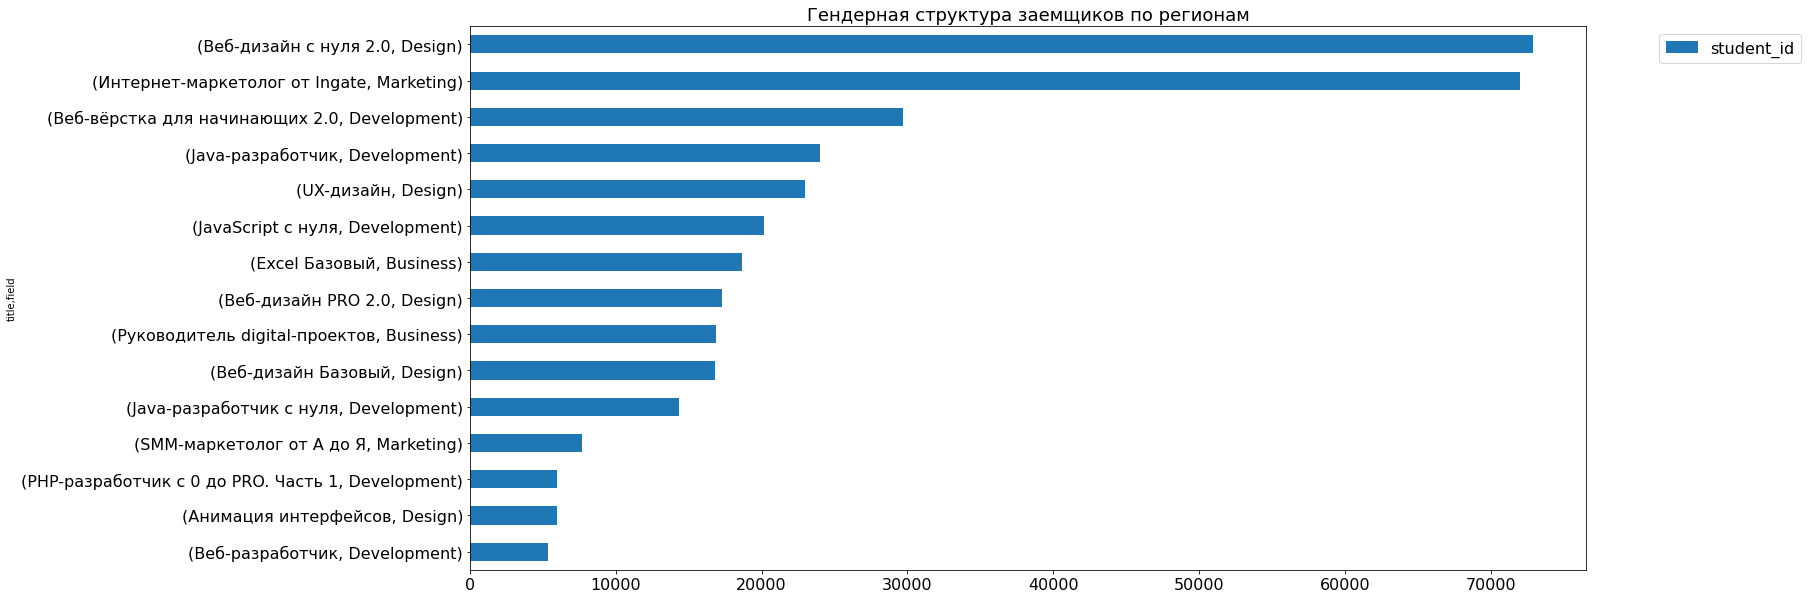

In [41]:
# определим количество студентов на каждом курсе
stud_count = data.groupby(['title','field'])['student_id'].count().sort_values()

plot = stud_count.plot.barh(figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков по регионам')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plt.show()

In [29]:
# построим горизонтальный barplot
plt.figure(figsize=(12, 6))
plt.barh(stud_count['title'], stud_count['students_count'], alpha = 0.5, color='r')
plt.xlabel('Количество студентов', fontsize=18)
plt.ylabel('Курсы', fontsize=18)
plt.tick_params(labelsize=18)
plt.title('Количество студентов на курсах ', fontsize=16)
plt.grid()
plt.legend()
plt.show()

KeyError: 'title'

<Figure size 864x432 with 0 Axes>

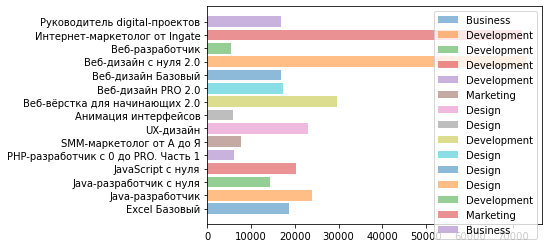

In [43]:
colors = [plt.cm.tab10(i/float(len(stud_count['field'])-1)) for i in range(len(stud_count['field']))]
for i, course in enumerate(stud_count['title']):
    plt.barh(stud_count['title'][i], stud_count['students_count'][i], alpha = 0.5,  label=stud_count['field'][i])
plt.legend()


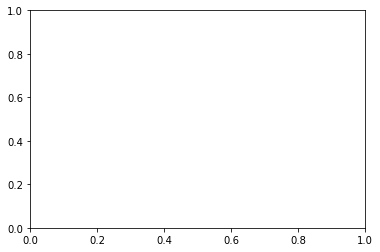

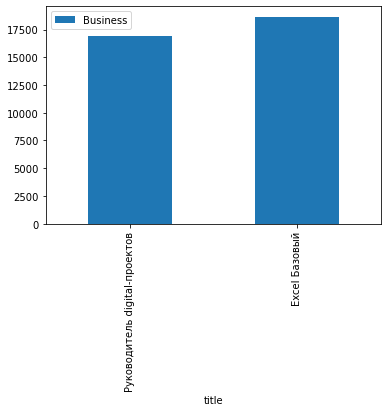

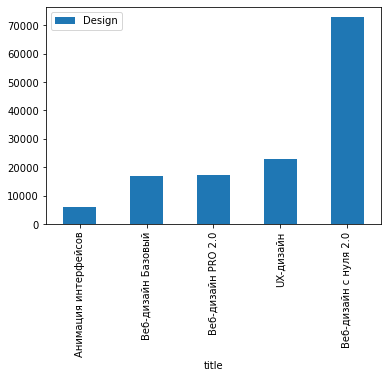

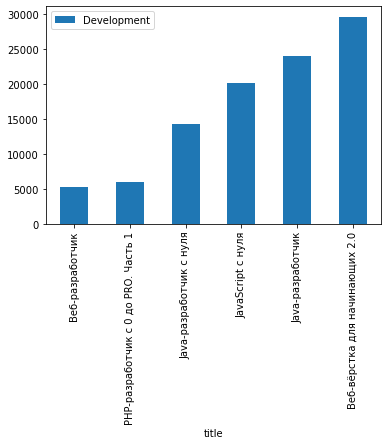

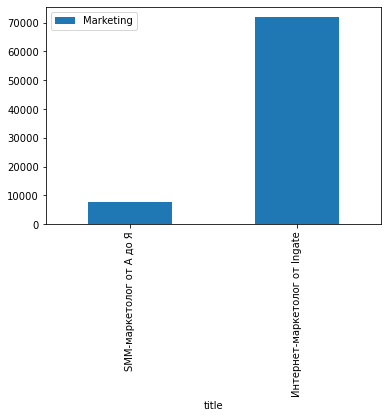

In [53]:
fig, ax = plt.subplots()
for fruit, gp in stud_count.groupby('field'):
    gp.plot.bar(x='title', y='students_count',  label=fruit)

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###



## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###




## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###




## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [ ]:
### YOUR CODE HERE ###


